# Praktikum 2 IF4074 Pembelajaran Mesin Lanjut - Clustering
* **Ricky Kennedy** - 13516105
* **Eric Jonathan** - 13516117
* **Christian Wibisono** - 13516147

### Data Preparation

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test = test.rename(columns={"num       ":"num"})

In [98]:
merged = train.append(test)
merged.reset_index(drop=True, inplace=True)

In [99]:
merged.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,51,0,3,130,220,0,0,160,1,2.0,?,?,?,0
1,54,1,4,125,216,0,0,140,0,0.0,?,?,?,1
2,48,1,2,100,252,0,0,100,0,0.0,?,?,?,0
3,36,1,3,130,209,0,0,178,0,0.0,?,?,6,0
4,56,1,4,120,85,0,0,140,0,0.0,?,?,?,0


In [100]:
train = train.replace('?', np.NaN)
test = test.replace('?', np.NaN)
merged = merged.replace('?', np.NaN)

In [101]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1289 entries, 0 to 1288
Data columns (total 14 columns):
age         1289 non-null int64
sex         1289 non-null int64
cp          1289 non-null int64
trestbps    1288 non-null object
chol        1280 non-null object
fbs         1289 non-null int64
restecg     1289 non-null int64
thalach     1288 non-null object
exang       1288 non-null object
oldpeak     1289 non-null float64
slope       104 non-null object
ca          3 non-null object
thal        28 non-null object
num         1289 non-null int64
dtypes: float64(1), int64(6), object(7)
memory usage: 141.1+ KB


### Nullity Check

In [102]:
merged.isnull().sum()

age            0
sex            0
cp             0
trestbps       1
chol           9
fbs            0
restecg        0
thalach        1
exang          1
oldpeak        0
slope       1185
ca          1286
thal        1261
num            0
dtype: int64

In [103]:
(merged.isnull().sum() / merged.shape[0]) * 100

age          0.000000
sex          0.000000
cp           0.000000
trestbps     0.077580
chol         0.698216
fbs          0.000000
restecg      0.000000
thalach      0.077580
exang        0.077580
oldpeak      0.000000
slope       91.931730
ca          99.767261
thal        97.827773
num          0.000000
dtype: float64

In [104]:
train['trestbps'] = train['trestbps'].astype(float)
merged['trestbps'] = merged['trestbps'].astype(float)
train['chol'] = train['chol'].astype(float)
merged['chol'] = merged['chol'].astype(float)
train['thalach'] = train['thalach'].astype(float)
merged['thalach'] = merged['thalach'].astype(float)
train['exang'] = train['exang'].astype(float)
merged['exang'] = merged['exang'].astype(float)
train['slope'] = train['slope'].astype(float)
merged['slope'] = merged['slope'].astype(float)
train['ca'] = train['ca'].astype(float)
merged['ca'] = merged['ca'].astype(float)
train['thal'] = train['thal'].astype(float)
merged['thal'] = merged['thal'].astype(float)

In [105]:
merged.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,1289.000000,1289.000000,1289.000000,1288.00000,1280.000000,1289.000000,1289.000000,1288.000000,1288.000000,1289.000000,104.000000,3.0,28.000000,1289.000000
mean,47.920093,0.698216,2.747091,130.17236,249.058594,0.065943,0.201707,142.256988,0.201087,0.397207,1.894231,0.0,5.642857,0.176881
std,6.985720,0.459210,0.861329,14.14839,57.451224,0.248278,0.440176,20.487075,0.400969,0.713191,0.338995,0.0,1.615074,0.381716
min,28.000000,0.000000,1.000000,92.00000,85.000000,0.000000,0.000000,82.000000,0.000000,0.000000,1.000000,0.0,3.000000,0.000000
25%,43.000000,0.000000,2.000000,120.00000,213.000000,0.000000,0.000000,130.000000,0.000000,0.000000,2.000000,0.0,5.250000,0.000000
50%,49.000000,1.000000,3.000000,129.00000,249.000000,0.000000,0.000000,143.000000,0.000000,0.000000,2.000000,0.0,6.000000,0.000000
75%,53.000000,1.000000,4.000000,140.00000,277.000000,0.000000,0.000000,157.000000,0.000000,1.000000,2.000000,0.0,7.000000,0.000000
max,66.000000,1.000000,4.000000,200.00000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,3.000000,0.0,7.000000,1.000000


In [106]:
merged[merged['restecg'] == 2]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
17,60,1,3,120.0,246.0,0,2,135.0,0.0,0.0,NaN,NaN,NaN,0
21,55,0,2,130.0,394.0,0,2,150.0,0.0,0.0,NaN,NaN,NaN,0
81,28,1,2,130.0,132.0,0,2,185.0,0.0,0.0,NaN,NaN,NaN,0
133,35,1,2,120.0,308.0,0,2,180.0,0.0,0.0,NaN,NaN,NaN,0
154,55,1,3,120.0,220.0,0,2,134.0,0.0,0.0,NaN,NaN,NaN,0
188,59,1,4,140.0,264.0,1,2,119.0,1.0,0.0,2.0,NaN,NaN,1
212,53,0,2,133.0,397.0,0,2,153.0,0.0,0.0,NaN,NaN,7.0,0
372,55,1,3,120.0,220.0,0,2,134.0,0.0,0.0,NaN,NaN,NaN,0
437,60,1,3,124.0,247.0,0,2,136.0,0.0,0.0,NaN,NaN,NaN,0
516,60,1,3,120.0,246.0,0,2,135.0,0.0,0.0,NaN,NaN,NaN,0


### Exploratory Data Analysis

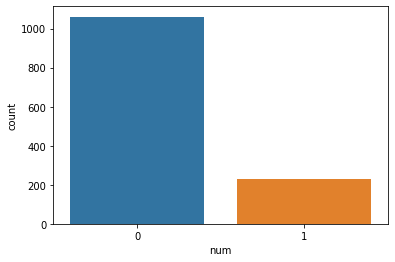

In [107]:
sns.countplot(x='num', data=merged)

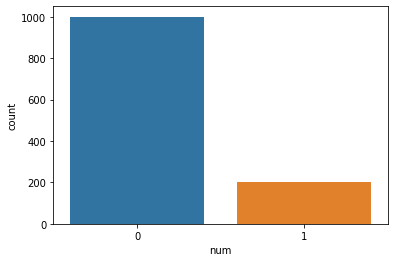

In [108]:
sns.countplot(x='num', data=train)

In [109]:
train['num'].value_counts()

0    1000
1     200
Name: num, dtype: int64

In [110]:
merged['num'].value_counts()

0    1061
1     228
Name: num, dtype: int64

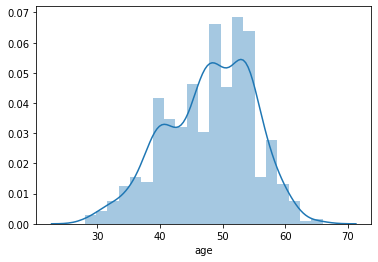

In [111]:
sns.distplot(merged['age'])

In [112]:
merged['num'] = merged['num'].astype('category')

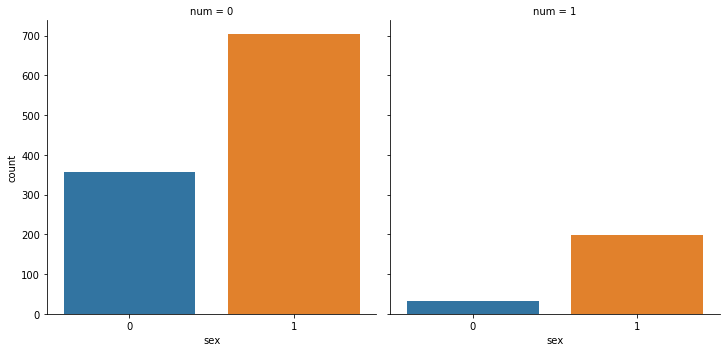

In [113]:
sns.catplot('sex', col='num', data=merged, kind='count')

In [143]:
merged.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,51,0,3,130.0,220.0,0,0,160.0,1.0,2.0,0
1,54,1,4,125.0,216.0,0,0,140.0,0.0,0.0,1
2,48,1,2,100.0,252.0,0,0,100.0,0.0,0.0,0
3,36,1,3,130.0,209.0,0,0,178.0,0.0,0.0,0
4,56,1,4,120.0,85.0,0,0,140.0,0.0,0.0,0


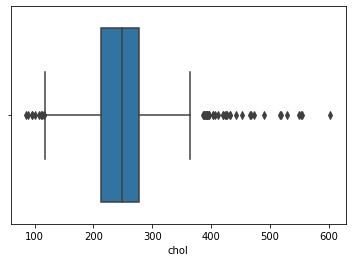

In [144]:
sns.boxplot(merged['chol'])

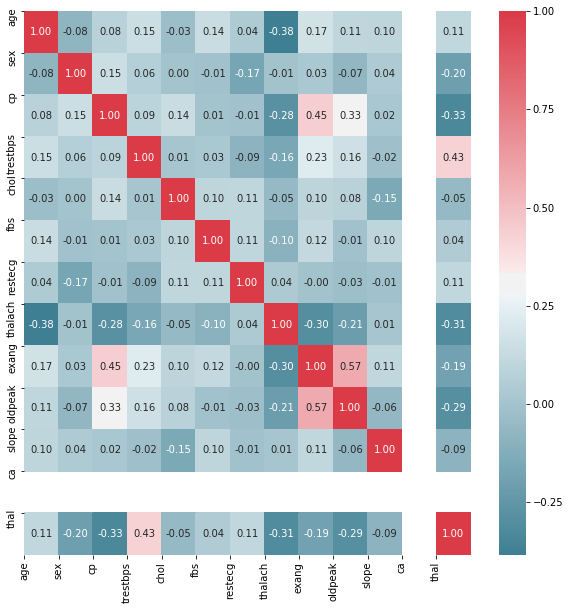

In [115]:
def heatMap(df):
    #Create Correlation df
    corr = df.corr()
    #Plot figsize
    fig, ax = plt.subplots(figsize=(10, 10))
    #Generate Color Map
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    #Generate Heat Map, allow annotations and place floats in map
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    #Apply xticks
    plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
    plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
    plt.show()
heatMap(merged)

### Data Preprocessing

#### Missing Value Imputation

In [116]:
col_to_impute = ["trestbps", "chol", "thalach", "exang"]

# for exang median == mode since it's only binary
for col in col_to_impute:
    train[col] = train[col].fillna(train[col].median())
    merged[col] = merged[col].fillna(merged[col].median())

In [117]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1289 entries, 0 to 1288
Data columns (total 14 columns):
age         1289 non-null int64
sex         1289 non-null int64
cp          1289 non-null int64
trestbps    1289 non-null float64
chol        1289 non-null float64
fbs         1289 non-null int64
restecg     1289 non-null int64
thalach     1289 non-null float64
exang       1289 non-null float64
oldpeak     1289 non-null float64
slope       104 non-null float64
ca          3 non-null float64
thal        28 non-null float64
num         1289 non-null category
dtypes: category(1), float64(8), int64(5)
memory usage: 132.3 KB


In [118]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 14 columns):
age         1200 non-null int64
sex         1200 non-null int64
cp          1200 non-null int64
trestbps    1200 non-null float64
chol        1200 non-null float64
fbs         1200 non-null int64
restecg     1200 non-null int64
thalach     1200 non-null float64
exang       1200 non-null float64
oldpeak     1200 non-null int64
slope       71 non-null float64
ca          3 non-null float64
thal        19 non-null float64
num         1200 non-null int64
dtypes: float64(7), int64(7)
memory usage: 131.3 KB


#### Feature Selection

In [119]:
train = train.drop(columns=['slope', 'ca', 'thal'])
merged = merged.drop(columns=['slope', 'ca', 'thal'])

In [120]:
train['restecg'] = train['restecg'].apply(lambda x: 1 if x == 2 else x)
merged['restecg'] = merged['restecg'].apply(lambda x: 1 if x == 2 else x)

In [121]:
categorical_col = ['sex', 'cp', 'fbs', 'restecg', 'exang']
for col in categorical_col:
    train[col] = train[col].astype("category")
    merged[col] = merged[col].astype("category")

In [122]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
scaler = RobustScaler()

In [123]:
# for i in df.columns:
#     print('\nAttribute-',i,':',df[i].dtypes)
#     Q1=df[i].quantile(0.25)
#     print('Q1',Q1)
#     Q3=df[i].quantile(0.75)
#     print('Q3',Q3)
#     IQR=Q3-Q1
#     print('IQR',IQR)
#     min_val=df[i].min()
#     max_val=df[i].max()
#     min_IQR=Q1-1.5*IQR
#     max_IQR=Q3+1.5*IQR 
#     if (min_val<min_IQR): 
#         print('Low outlier is found') 
#     if (max_val>max_IQR): 
#         print('High outlier is found')

In [125]:
# Q1=df['chol'].quantile(0.25)
# Q3=df['chol'].quantile(0.75)
# IQR=Q3-Q1
# min_val=df['chol'].min()
# max_val=df['chol'].max()
# min_IQR=Q1-1.5*IQR
# max_IQR=Q3+1.5*IQR 
# df = df[df.chol > min_IQR]
# df = df[df.chol < max_IQR]
# df.shape

In [126]:
X_train = train.drop(columns=['num'])
X_train = pd.get_dummies(X_train)
X_train = scaler.fit_transform(X_train)
y_train = train['num']

X = merged.drop(columns=['num'])
X = pd.get_dummies(X)
X = scaler.fit_transform(X)
y = merged['num']

In [127]:
# from imblearn.over_sampling import RandomOverSampler
# ros = RandomOverSampler(random_state=0)
# X_train, y_train = ros.fit_resample(X_train, y_train)
# print(pd.Series(y_train).value_counts())

# ros = RandomOverSampler(random_state=0)
# X, y = ros.fit_resample(X, y)
# print(pd.Series(y).value_counts())

# from imblearn.under_sampling import ClusterCentroids
# cc = ClusterCentroids(random_state=0)
# X_train, y_train = cc.fit_resample(X_train, y_train)
# print(pd.Series(y_train).value_counts())

# cc = ClusterCentroids(random_state=0)
# X, y = cc.fit_resample(X, y)
# print(pd.Series(y).value_counts())

from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_train, y_train = smote_enn.fit_resample(X_train, y_train)
print(pd.Series(y_train).value_counts())

smote_enn = SMOTEENN(random_state=0)
X, y = smote_enn.fit_resample(X, y)
print(pd.Series(y).value_counts())


# from imblearn.combine import SMOTETomek
# smote_tomek = SMOTETomek(random_state=0)
# X_train, y_train = smote_tomek.fit_resample(X_train, y_train)
# print(pd.Series(y_train).value_counts())

# smote_tomek = SMOTETomek(random_state=0)
# X, y = smote_tomek.fit_resample(X, y)
# print(pd.Series(y).value_counts())


0    1061
1     228
Name: num, dtype: int64
1    1037
0    1025
dtype: int64


In [128]:
# X_train = X.values
# y_train = y.values

# X_train_combine = X_combine.values
# y_train_combine = y_combine.values

In [129]:
from scipy.stats import mode
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score

def purity_score(y_truth, y_predicted):
    labels = np.zeros_like(y_predicted)
    for i in range(2):
        mask = (y_predicted == i)
        labels[mask] = mode(y_truth[mask])[0]
    return accuracy_score(y_truth, labels)

## KMEANS

In [130]:
from sklearn.cluster import KMeans

In [131]:
kmeans = KMeans(2, random_state=69)
kmeans_combine = KMeans(2, random_state=69)

In [132]:
kmeans.fit(X_train)
kmeans_combine.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=69, tol=0.0001, verbose=0)

In [133]:
print("Predicted label Train model only : ", kmeans.labels_)
print("Purity Score Train model only : ", purity_score(y_train, kmeans.labels_))

print()

print("Predicted label Combine model : ", kmeans_combine.labels_)
print("Purity Score Combine model : ", purity_score(y, kmeans_combine.labels_))

Predicted label Train model only :  [1 0 0 ... 0 1 1]
Purity Score Train model only :  0.8301217038539553

Predicted label Combine model :  [0 1 1 ... 0 1 0]
Purity Score Combine model :  0.8288069835111542


## Agglomerative

In [134]:
from sklearn.cluster import AgglomerativeClustering

In [135]:
agg = AgglomerativeClustering(2, linkage="ward")
agg.fit(X_train)

agg_combine = AgglomerativeClustering(2, linkage="ward")
agg_combine.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2,
                        pooling_func='deprecated')

In [136]:
print("Predicted label Train model only : ", agg.labels_)
print("Purity Score Train model only : ", purity_score(y_train, agg.labels_))

print()

print("Predicted label Combine model : ", agg_combine.labels_)
print("Purity Score Combine model : ", purity_score(y, agg_combine.labels_))

Predicted label Train model only :  [0 1 1 ... 1 0 0]
Purity Score Train model only :  0.8407707910750507

Predicted label Combine model :  [0 1 1 ... 0 0 0]
Purity Score Combine model :  0.8617846750727449


In [137]:
agg = AgglomerativeClustering(2, linkage="single")
agg.fit(X_train)

agg_combine = AgglomerativeClustering(2, linkage="single")
agg_combine.fit(X)

print("Predicted label Train model only : ", agg.labels_)
print("Purity Score Train model only : ", purity_score(y_train, agg.labels_))

print()

print("Predicted label Combine model : ", agg_combine.labels_)
print("Purity Score Combine model : ", purity_score(y, agg_combine.labels_))

Predicted label Train model only :  [0 0 0 ... 0 0 0]
Purity Score Train model only :  0.5040567951318459

Predicted label Combine model :  [0 0 0 ... 0 0 0]
Purity Score Combine model :  0.5033947623666344


In [138]:
agg = AgglomerativeClustering(2, linkage="complete")
agg.fit(X_train)

agg_combine = AgglomerativeClustering(2, linkage="complete")
agg_combine.fit(X)

print("Predicted label Train model only : ", agg.labels_)
print("Purity Score Train model only : ", purity_score(y_train, agg.labels_))

print()

print("Predicted label Combine model : ", agg_combine.labels_)
print("Purity Score Combine model : ", purity_score(y, agg_combine.labels_))

Predicted label Train model only :  [0 0 0 ... 0 0 0]
Purity Score Train model only :  0.5167342799188641

Predicted label Combine model :  [0 0 0 ... 0 0 0]
Purity Score Combine model :  0.5208535402521823


In [139]:
agg = AgglomerativeClustering(2, linkage="average")
agg.fit(X_train)

agg_combine = AgglomerativeClustering(2, linkage="average")
agg_combine.fit(X)

print("Predicted label Train model only : ", agg.labels_)
print("Purity Score Train model only : ", purity_score(y_train, agg.labels_))

print()

print("Predicted label Combine model : ", agg_combine.labels_)
print("Purity Score Combine model : ", purity_score(y, agg_combine.labels_))

Predicted label Train model only :  [0 0 0 ... 0 0 1]
Purity Score Train model only :  0.5289046653144016

Predicted label Combine model :  [0 0 0 ... 0 0 0]
Purity Score Combine model :  0.502909796314258


## DBSCAN

In [140]:
from sklearn.cluster import DBSCAN

In [141]:
dbscan_model = DBSCAN(min_samples=3, eps=1.5)
dbscan_model.fit(X_train)

dbscan_model_combine = DBSCAN(min_samples=3, eps=1.5)
dbscan_model_combine.fit(X)

DBSCAN(algorithm='auto', eps=1.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=3, n_jobs=None, p=None)

In [142]:
print("Predicted label Train model only : ", dbscan_model.labels_)
print("Purity Score Train model only : ", purity_score(y_train, dbscan_model.labels_))

print()

print("Predicted label Combine model : ", dbscan_model_combine.labels_)
print("Purity Score Combine model : ", purity_score(y, dbscan_model_combine.labels_))

Predicted label Train model only :  [0 0 0 ... 0 0 8]
Purity Score Train model only :  0.4974645030425964

Predicted label Combine model :  [0 0 0 ... 0 0 0]
Purity Score Combine model :  0.5223084384093113
